## Bootstrapping

- T-tests and bootstrapping

--- 
Basically, use non parameteric testing as much as possible as opposed to parameteric testing approaches

- get t-value for the distribution
- swap the elements in the rows
- recalculate the t-values for each distribution
- check where the initial t-values lies in the distribution
- see the p value of the original t-value in the t-value distribution


This is better than the parameteric testing because, if you have an outlier in the data, it is the same outlier in all the swaps. Hence, it is relatively non-biased.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

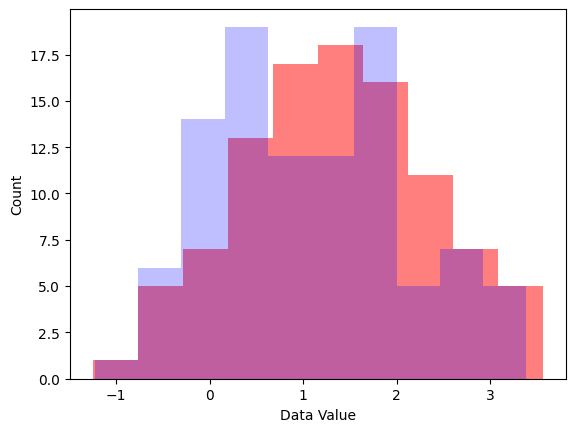

In [2]:
np.random.seed(0)

N = 100
mu = [1.3, 1]
std = [1, 1]

d1 = np.random.randn(N)*std[0] + mu[0]
d2 = np.random.randn(N)*std[1] + mu[1]

plt.figure()
plt.hist(d1, color='r', alpha=0.5)
plt.hist(d2, color='b', alpha=0.25)
plt.xlabel("Data Value")
plt.ylabel("Count")
plt.show()

In [3]:
tstats = stats.ttest_1samp(d1-d2, 0)
print(f"Tvalue: {tstats.statistic}, PVal: {tstats.pvalue}")

Tvalue: 2.030322987079577, PVal: 0.04500575023448435


### Introducing Randomness

Basically the bootstrap and the t distribution

In [4]:
nrand = 1000
t_est_values = np.zeros((nrand))

for i in range(nrand):
    # random rand goes from [0, 1]
    new_data = np.sign(np.random.rand(N) - 0.5) * (d1-d2)
    t_est_values[i] = stats.ttest_1samp(new_data, 0).statistic

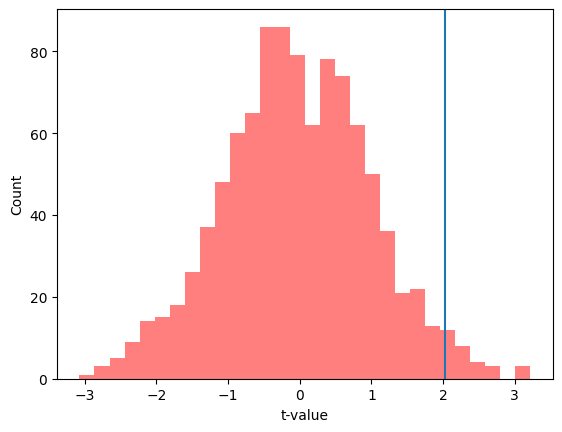

In [5]:
# Ususally when the iniital data is well behaved, we should be seeing a peak at 0
plt.hist(t_est_values, bins=30, color='r', alpha=0.5)
plt.axvline(x=tstats.statistic)
plt.xlabel("t-value")
plt.ylabel("Count")
plt.show()

In [6]:
# Absolute because of the not equal to 0. It becomes two sided.

randp = 1 - np.sum(np.abs(t_est_values) < tstats.statistic)/nrand
randp

0.05400000000000005

#### Bootstrapping

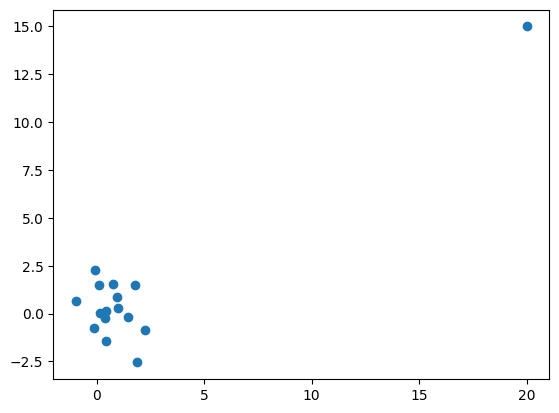

In [7]:
np.random.seed(0)

N = 16
d1 = np.random.randn(N)
d2 = np.random.randn(N)

d1[-1] = 20
d2[-1] = 15


plt.scatter(d1, d2)
plt.show()

In [8]:
rval, pval = stats.pearsonr(d1, d2)
rval, pval

(0.9170709404550899, 5.796069372135303e-07)

In [14]:
nboot = 1000
corr = np.zeros(nboot)

for i in range(nboot):
    new_idx = np.random.randint(N, size=N)
    new_d1 = d1[new_idx]
    new_d2 = d2[new_idx]
    
    corr[i], _ = stats.pearsonr(new_d1, new_d2)
    
# Get the confidence intervals
cis = np.percentile(corr, [2.5, 97.5])

In [17]:
cis[0]

-0.6104281967344428

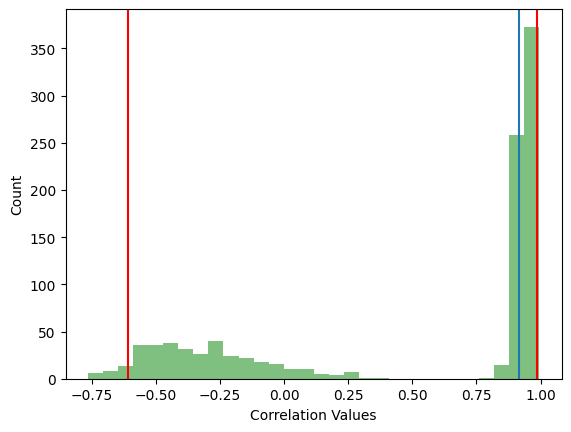

In [22]:
plt.hist(corr, bins=30, color='g', alpha=0.5)
plt.axvline(x=cis[0], color='r')
plt.axvline(x=cis[1], color='r')
plt.axvline(x=rval)
plt.xlabel("Correlation Values")
plt.ylabel("Count")
plt.show()